<a href="https://colab.research.google.com/github/jamirando/EE-298-ML/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds  

For loading the dataset, We make use of the tensorflow datasets library. The RGB images are normalized and split into their R,G, and B channels.

In [2]:
unlabelled, test, train = tfds.load('stl10', split=['unlabelled[:10%]','test','train'], shuffle_files=False, as_supervised=True)
n_images = 10000
# unlabelled_set = unlabelled.take(n_images)

images = np.array([np.float32(image)/255 for image, _ in tfds.as_numpy(unlabelled)])
orig_shape = images.shape
print('PCA Set Shape: {0}'.format(images.shape))

# test = tfds.load('stl10', split='test', as_supervised=True)
# test_set = test.take(8000)

x_test = np.array([np.float32(image)/255 for image, _ in tfds.as_numpy(test)])
y_test = np.array([label for _, label in tfds.as_numpy(test)])
# x_test = np.array([])
# y_test = np.array([])
# for image, label in tfds.as_numpy(test_set):
#   x_test = np.append(x_test, np.array([np.float32(image)/255]))
#   y_test = np.append(y_test, np.array([label]))
print('Test Set Shape: {0}'.format(x_test.shape))

x_train = np.array([np.float32(image)/255 for image, _ in tfds.as_numpy(train)])
y_train = np.array([label for _, label in tfds.as_numpy(train)])
print('Train Set Shape: {0}'.format(x_train.shape))


images_R = images[:,:,:,0]
images_G = images[:,:,:,1]
images_B = images[:,:,:,2]

orig_shape = images_R.shape

x_test_R = x_test[:,:,:,0]
x_test_G = x_test[:,:,:,1]
x_test_B = x_test[:,:,:,2]

PCA Set Shape: (10000, 96, 96, 3)
Test Set Shape: (8000, 96, 96, 3)
Train Set Shape: (5000, 96, 96, 3)


The plot_images function creates a plot of 9 sample images arranged in a 3x3 grid. This is used for visualization purposes

In [3]:
import math

def plot_images(images, title, n_images=9):
    plt.figure(figsize=(10,10))
    plt.suptitle(title, fontsize=20)
    side = int(math.sqrt(n_images))
    for i in range(n_images):
        plt.subplot(side, side, i + 1)
        image = images[i]
        plt.imshow(image)
        plt.axis('off')

    plt.show()
    plt.close('all')

# Part 1. PCA

This PCA implementation is split into two parts. The first part (PCA function) solves the eigendecomposition of the input and returns the eigenvalues. The second part(reconstruct function) uses the returned eigenvalues to reconstruct the images. 

The mse function is the generic mean square error implementation.

In [4]:
from scipy import linalg as la

def PCA(channel):
  channel = np.float32(channel)
  mu_ch = np.mean(channel)
  std_ch = np.std(channel)
  channel = (channel - mu_ch)/std_ch

  X = np.reshape(channel,(-1,channel.shape[0]))

  print('X.shape: {0}'.format(X.shape))
  # print('Inside PCA:')

  S = np.matmul(X, np.transpose(X))/channel.shape[0]
  D, B = la.eig(S, left=True, right=False)
  print(' S.shape: {0}'.format(S.shape))
  print(' D.shape: {0}'.format(D.shape))
  print(' B.shape:{0}'.format(B.shape))


  # BM = B[:,:M]
  # BM_BMT = np.matmul(BM, np.transpose(BM))
  # R = np.matmul(BM_BMT, X)
  # # R = np.matmul(BM_BMT, X.T)
  # R = np.reshape(R, orig_shape)
  # print(' BM.shape: {0}'.format(BM.shape))
  # # print(' BM_BMT.shape: {0}'.format(BM_BMT.shape))
  # print(' R.shape:{0}'.format(R.shape))

  # R *= std_ch
  # R += mu_ch
  # R = np.clip(R, 0, 1)
  
  return B, mu, std

def reconstruct(channel, B, M):

  # channel = np.float32(channel)
  # mu_ch = np.mean(channel)
  # channel -= mu_ch

  # std_ch = np.std(channel)
  # channel /= std_ch

  BM = B[:,:M]
  print(' BM.shape:{0}'.format(BM.shape))
  BM_BMT = np.matmul(BM, np.transpose(BM))  
  
  X = np.float32(np.reshape(channel, (-1, channel.shape[0])))
  R = np.matmul(BM_BMT,X)
  R = np.reshape(R,channel.shape)
  print(' R.shape:{0}'.format(R.shape))
  
  # R *= std_ch
  # R += mu_ch
  R = np.clip(R, 0, 255)
  print(' Channel Reconstruction Done')
  return np.absolute(R)

def mse(original, reconstruction):
  return np.square(np.subtract(original,reconstruction)).mean()

This script is the main script file for Part 1.

The first thing this script does is to check if there exists a npz file containing the eigenvalues for all 3 channels. If the file exists, the data saved data is used. Otherwise, the PCA function is called for each channel and the returned eigenvalues are then stored to a npz file for future use.

The next part of the script solves for the reconstruction of the test set for varying values of M and its respective mse against the original test images. It also shows sample reconstructions for each M.

B loaded


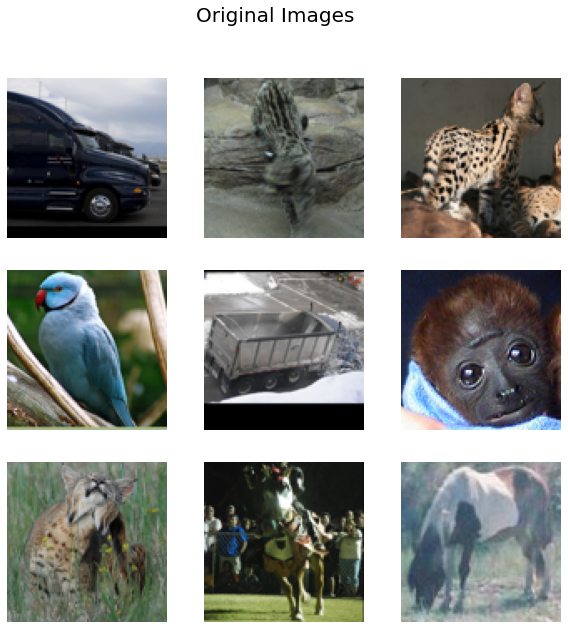

R channel:
 BM.shape:(9216, 32)
 R.shape:(8000, 96, 96)
 Channel Reconstruction Done
G channel:
 BM.shape:(9216, 32)
 R.shape:(8000, 96, 96)
 Channel Reconstruction Done
B channel:
 BM.shape:(9216, 32)
 R.shape:(8000, 96, 96)
 Channel Reconstruction Done
Computing MSE:
0.24484326


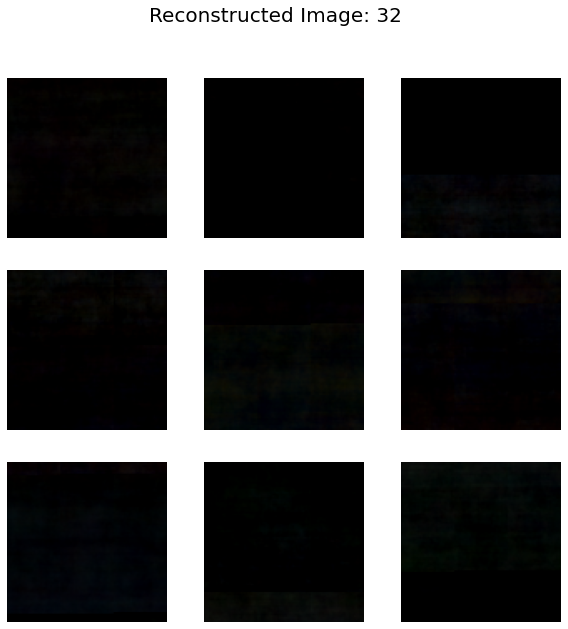

R channel:
 BM.shape:(9216, 64)
 R.shape:(8000, 96, 96)
 Channel Reconstruction Done
G channel:
 BM.shape:(9216, 64)
 R.shape:(8000, 96, 96)
 Channel Reconstruction Done
B channel:
 BM.shape:(9216, 64)
 R.shape:(8000, 96, 96)
 Channel Reconstruction Done
Computing MSE:
0.23979275


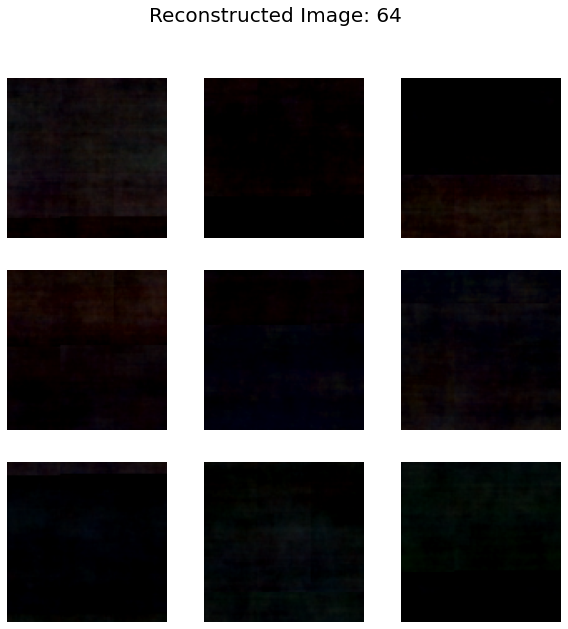

R channel:
 BM.shape:(9216, 256)
 R.shape:(8000, 96, 96)
 Channel Reconstruction Done
G channel:
 BM.shape:(9216, 256)


In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/B_{0}v3.npz'.format(n_images)
# filename = 'B_{0}.npz'.format(n_images)
try:
  with np.load(filename) as data:
    B_R = data['B_R']
    B_G = data['B_G']
    B_B = data['B_B']
  print('B loaded')
except:
  B_R = PCA(images_R)
  B_G = PCA(images_G)
  B_B = PCA(images_B)
  np.savez_compressed('B_{0}'.format(n_images), B_R=B_R, B_G=B_G, B_B=B_B)
  print('B saved as B_{0}.npz'.format(n_images))

plot_images(x_test, title='Original Images')
# plot_images(images, title='Original Images')

M_list = [32,64,256,512,1028,2046,4098]
# M_list=[9216]
mse_list = []

for M in M_list:
  print('R channel:')
  R = reconstruct(x_test_R,B_R,M)
  # R = reconstruct(images_R,B_R,M)
  print('G channel:')
  G = reconstruct(x_test_G,B_G,M)
  # G = reconstruct(images_G,B_G,M)
  print('B channel:')
  B = reconstruct(x_test_B,B_B,M)
  # B = reconstruct(images_B,B_B,M)

  recon = np.stack([R,G,B],axis=-1)
  print('Computing MSE:')
  current_mse = mse(x_test,recon)
  print(current_mse)
  mse_list = np.append(mse_list,current_mse)          

  plot_images(recon, title='Reconstructed Image: {0}'.format(M))


In [ ]:
print(mse_list)

In [ ]:
plt.plot(M_list,mse_list,'bx-')
plt.title('MSE vs z-dim')
plt.xlabel('z-dim')
plt.ylabel('MSE')
plt.show()

# Part 2. GMM

In [ ]:
import numpy as np

M_list = [32,64,256,512,1028,2046,4098]
M = M_list[-1] #M_list[np.argmin(mse_list)]
X_train_R = np.matmul(np.reshape(images_R,(images_R.shape[0],-1)),B_R[:,:M])
X_train_G = np.matmul(np.reshape(images_G,(images_G.shape[0],-1)),B_G[:,:M])
X_train_B = np.matmul(np.reshape(images_B,(images_B.shape[0],-1)),B_B[:,:M])
X_train = np.stack([X_train_R,X_train_G,X_train_B],axis=-1)
X_train = np.reshape(X_train, (-1,X_train.shape[1]))
print(X_train.shape)

In [ ]:
from scipy.stats import multivariate_normal

# n_dim = M_list[-1] 
n_dim = M
n_components = 10

mu_shape = (n_components,n_dim)
mu = np.random.normal(size=mu_shape)
sigma = [np.identity(n_dim) for _ in range(n_components)]
sigma_shape = np.array(sigma).shape
pi = np.random.randint(1,100, size=(n_components,1))
pi = pi/pi.sum()
# print('Initial mu:',mu)
# print('Initial sigma:',sigma)
# print('Initial pi:',pi)

n_loop = 100
nll = []

for loop in range(n_loop):
  rv = [multivariate_normal(mu[i],sigma[i]) for i in range(n_components)]
  g_val = np.array([rv[i].pdf(X_train) for i in range(n_components)])

  weighted_g_val = np.array([pi[i]*rv[i].pdf(X_train) for i in range(n_components)])
  weighted_g_val = np.log(weighted_g_val.sum(axis=0)).sum()
  nll.append(-weighted_g_val)

  p = np.repeat(pi, X_train.shape[0], axis=1)
  g_val_sum = np.multiply(p, g_val)
  g_val_sum = g_val_sum.sum(axis=0)

  g_val_sum = np.reshape(g_val_sum, (-1,g_val_sum.shape[0]))

  g_val_sum = np.repear(g_val_sum, n_components, axis=0)

  r = np.multiply(p,g_val)
  r = np.divide(r, g_val_sum)

  Nk = r.sum(axis=1)
  Nk = np.repeat(Nk, n_components, axis=0)

  r = np.repeat(r, n_components, axis=0)
  x_t = [X_train.transpose() for _ in range(n_components)]
  x_t = np.concatenate(x_t,axis=0)
  mu = np.multiply(r, x_t).sum(axis=1)
  mu = np.divide(mu, Nk)
  mu = np.reshape(mu,[-1,1])

  x_t = x_t - mu
  x_tt = x_t
  x_t = np.multiply(x_t,r)
  x_t = np.reshape(x_t, (n_components, n_dim, -1))
  x_tt = np.reshape(x_tt, (n_components, n_dim, -1))

  sigma = [np.matmul(x_t[i], x_tt[i].transpose()) for i in range(x_t.shape[0])]

  N = np.reshape(Nk, (-1,1))
  N = np.repeat(N, n_components, axis=1)
  N = np.reshape(N, (n_components, n_components, -1))
  sigma = [np.divide(sigma[i], N[i]) for i in range(n_components)]

  Nk = Nk[::2]
  Nk = np.reshape(Nk, pi.shape)/X_train.shape[0]
  pi = np.reshape(Nk, pi.shape)

  mu = np.reshape(mu, mu_shape)
  sigma = np.reshape(np.array(sigma), sigma_shape)
  if loop == n_loop - 1:
    print('mu'.format(mu))
    print('sigma'.format(sigma))
    print('pi'.format(pi))
x = [loop for loop in range(n_loop)]
plt.plot(x,nll)
plt.title('Negative log-likelihood predicted by a GMM')
plt.xlabel('EM iteration')
plt.ylabel('NLL')
plt.show